In [4]:
import os,csv,json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

steps:
- import csv
- plot basic info- maybe histograms
- make cut offs
- ideally also visualize

In [131]:
# import csv
csv_file_name = "/home/emilyjanedennis/tscratch/z269/lightsheet/3dunet_output/pooled_cell_measures/z269_cell_measures.csv"

In [132]:
fulldf = pd.read_csv(csv_file_name)
fulldf = fulldf.apply(pd.to_numeric, errors='coerce')
fulldf.keys()

Index(['Unnamed: 0', 'intensity', 'maximum perimeter', 'no_voxels',
       'sphericity', 'val', 'x', 'y', 'z', 'z depth'],
      dtype='object')

In [133]:
df = fulldf[fulldf["z depth"] > 1]
df = df[df["no_voxels"] > 1]
df = df[df["maximum perimeter"] > 1]

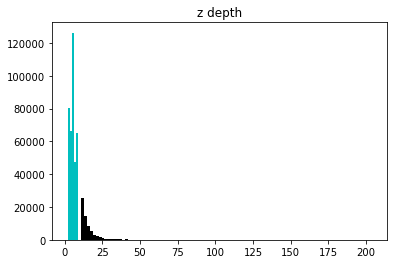

In [134]:
zlim = 10

zdepth = df['z depth']
goodzdepth = zdepth[zdepth < zlim]
badzdepth = zdepth[zdepth > zlim]
plt.figure()
# we are imaging at ~10 micron, expect soma < 150mm2 (generously, also allows for clumps of cells)
#plt.hist([goodzdepth, badzdepth], bins=50)

plt.hist(goodzdepth, bins=5, facecolor='c')
plt.hist(badzdepth, bins=100, facecolor='k')
plt.title('z depth')
plt.show()

In [135]:
slim=0.1

#sphericity = pd.to_numeric(df['sphericity'])

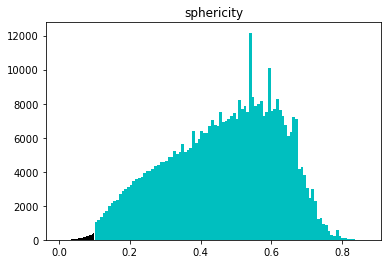

In [136]:
goodsphericity = sphericity[sphericity > slim]
badsphericity = sphericity[sphericity < slim]
# we are imaging at ~10 micron, expect soma < 100mm2 (generously, also allows for clumps of cells)
plt.figure
plt.hist(goodsphericity,bins=100, facecolor='c')
plt.hist(badsphericity,bins=30, facecolor='k')
plt.title('sphericity')
plt.show()

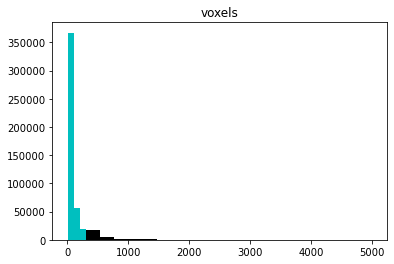

In [137]:
vlim = 300

vox = df['no_voxels']
realvox = vox[vox < 5000]
badvox = realvox[realvox > vlim]
plt.figure()
plt.hist(realvox,bins=50, facecolor='c')
plt.hist(badvox,bins=20, facecolor='k')
plt.title('voxels')
plt.show()


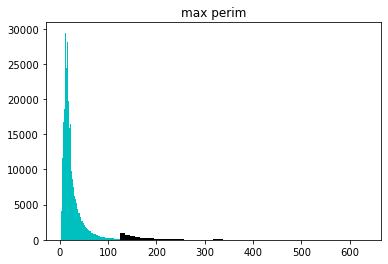

In [138]:
mplim = 125

mp = pd.to_numeric(df['maximum perimeter'])
goodmp = mp[mp < mplim]
badmp = mp[mp > mplim]
plt.figure()
plt.hist(goodmp,bins=100, facecolor='c')
plt.hist(badmp,bins=50, facecolor='k')
plt.title('max perim')
plt.show()

In [146]:
singlezplane = df[df.z < 200]
singlezplane = singlezplane[singlezplane.z > 148]
singlezplane.columns


Index(['Unnamed: 0', 'intensity', 'maximum perimeter', 'no_voxels',
       'sphericity', 'val', 'x', 'y', 'z', 'z depth'],
      dtype='object')

In [147]:
max(df.z)

535

In [148]:
singlezplane.columns = ['num1', 'intensity', 'maximum_perimeter', 'no_voxels', 'sphericity', 'val', 'x', 'y', 'z', 'z_depth']

singlez_z = singlezplane[singlezplane.z_depth > zlim]
singlez_v = singlez_z[singlez_z.no_voxels > vlim]
singlez_mp = singlez_v[singlez_v.maximum_perimeter > mplim]
singlez_s = singlez_mp[singlez_mp.sphericity < slim]

sub = singlezplane[singlezplane.z_depth < zlim]
sub = sub[sub.no_voxels < vlim]
sub = sub[sub.maximum_perimeter < mplim]
sub = sub[sub.sphericity > slim]

<function matplotlib.pyplot.show(*args, **kw)>

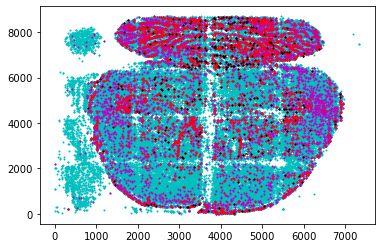

In [150]:
plt.figure
plt.scatter(singlezplane.x,singlezplane.y,s=1,facecolor='c')
plt.scatter(singlez_z.x,singlez_z.y,s=1,facecolor='m')
plt.scatter(singlez_v.x,singlez_v.y,s=1,facecolor='r')
plt.scatter(singlez_mp.x,singlez_mp.y,s=1,facecolor='k')
plt.scatter(singlez_s.x,singlez_s.y,s=1,facecolor='w')
plt.show

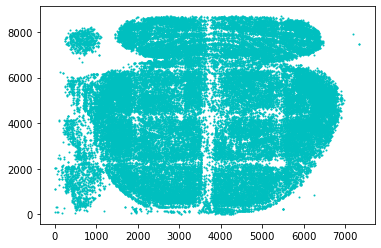

In [151]:
plt.scatter(sub.x,sub.y,s=1,facecolor='c')

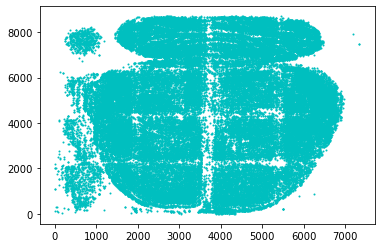

In [152]:
plt.scatter(singlezplane.x,singlezplane.y,s=1,facecolor='c')

In [ ]:
# add mask 2447x2900

In [ ]:
import SimpleITK as sitk

In [ ]:
# need to have points in mri space so need to transformix points
# which means I need to get points into a transformix-readable format first
# then warp to MRI - try to keep id of points intact
    # this would allow further processing (like slicing by z pln, etc)
    # without additional warp steps
# then use the transformed points + mask/segmentations
# this could probably all be done in ng as well